In [1]:
import sys
sys.path.insert(0, '../')
from lib import *

from scipy.stats import norm
from scipy.optimize import curve_fit

%matplotlib inline

DEBUG = False;

# Define Gaussian function
def gaussian(x, mu, sigma,A):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

## Ratios

In [3]:
# WEEK="APSAIA_VUV_2";
# WEEK="DAPHNE_VUV";OV=12


plt.figure(dpi=200)



for WEEK,counter in zip(["APSAIA_VUV","APSAIA_VUV_2","DAPHNE_VUV"],[1,2,3]):
    z=0;
# for WEEK in ["DAPHNE_VUV"]:
# for WEEK in ["APSAIA_VUV_2"]:
# for WEEK in ["APSAIA_VUV"]:

    compress=False

    path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
    Runs=open_runs_table("../macros/"+WEEK+".xlsx")

    ovs=[2 , 2.5, 3]
    if WEEK=="DAPHNE_VUV":ovs=[7,9,12]
    
    for OV in ovs:
        
        for run in Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageXA"]==OV)]["Run"]:
        # run=Runs.iloc[5]["Run"]

            print(run)
        # def charge_ratio(charge):
        #     SiPMs_12=(charge[0]+charge[1])
        #     SiPMs_34=(charge[2]+charge[3])
        #     return SiPMs_12/SiPMs_34

            # for chargemode in ["ChargeRange"]:
            for chargemode in ["PeakFinderInRange"]:
                charge =[]
                charge2=[]

path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")

ovs=[2 , 2.5, 3]
if WEEK=="DAPHNE_VUV":ovs=[7,9,12]

for OV in ovs:
    
    for run in Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageXA"]==OV)]["Run"]:

                q_cut=Charge_vars[chargemode]*ADCsxticks2PE>2
                
                CUT=ped_cut*amp_cut
                hist, bins = np.histogram(Charge_vars[chargemode]*ADCsxticks2PE,100,[0,40])

                # popt, _ = curve_fit(gaussian, bins[:-1], hist,[16,5,852])
                
                # plt.hist(Charge_vars[chargemode][CUT],100,[0,.4e5],alpha=.5,histtype="step",linewidth=2)

                charge.append(np.mean(Charge_vars[chargemode][CUT]*ADCsxticks2PE))
                charge2.append(popt[0])

                # plt.legend()
                # print(chargemode)
                # print(charge_ratio(charge ))
                # print(charge_ratio(charge2))    
                
                # plt.legend(["0","1","2","3"])
                
                if (counter==1):
                    if  z==0:plt.plot(run,(charge[0]+charge[1])/(charge[3]+charge[2]),".",color="tab:green" ,label=WEEK)
                    else    :plt.plot(run,(charge[0]+charge[1])/(charge[3]+charge[2]),".",color="tab:green")
                if (counter==2):
                    if  z==0:plt.plot(run,(charge[0]+charge[1])/(charge[3]+charge[2]),"s",color="tab:orange" ,label=WEEK)
                    else    :plt.plot(run,(charge[0]+charge[1])/(charge[3]+charge[2]),"s",color="tab:orange")
                if (counter==3):
                    if  z==0:plt.plot(run,(charge[0]+charge[1])/(charge[3]+charge[2]),"x",color="tab:blue" ,label=WEEK)
                    else    :plt.plot(run,(charge[0]+charge[1])/(charge[3]+charge[2]),"x",color="tab:blue")
                z=1
                # plt.plot(run,(charge[1])/(charge[3]),"x")
                # plt.plot(run,(charge[1])/(charge[2]),"s")
        
        
plt.legend()
# plt.xlim([0,1])
plt.ylim([.8,1.2])
plt.grid()
plt.xlabel("run")

0
1
10
11
32
33
2
3
12
13
34
35
4
5
14
15
36
37
0
1
10
11
32
33
51
2
3
12
13
34
35
52
4
5
14
15
36
37
53


NameError: name 'Charge_vars' is not defined

<Figure size 1200x800 with 0 Axes>

## Ch0

1


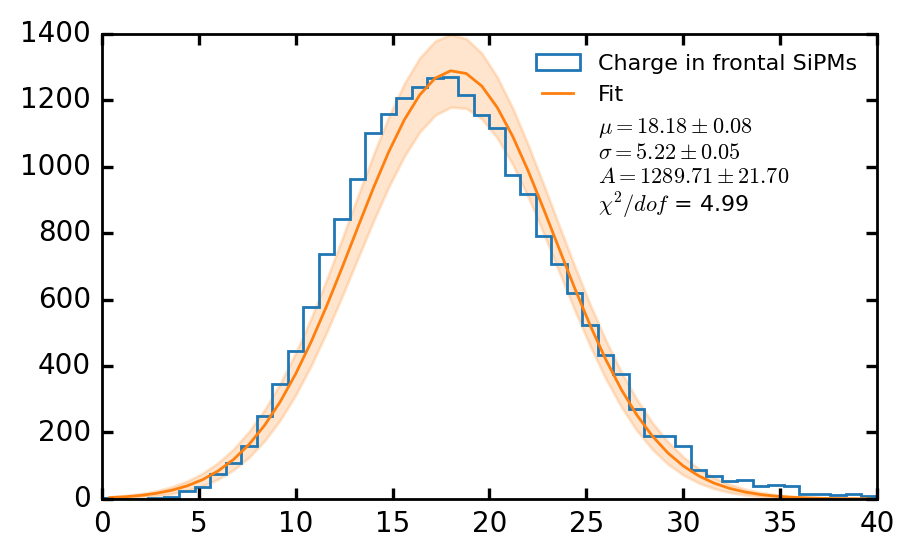

In [56]:
WEEK="APSAIA_VUV_2";OV=4
WEEK="DAPHNE_VUV"  ;OV=4

path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")
compress=False

aux_charge=[]
aux_cut=[]

for run in [Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageSiPMs"]==OV)]["Run"][1]]:
    print(run)
    #  Data

    # for chargemode in ["ChargePeakRange","ChargeRangeAverageWvf","ChargeRange","ChargeRangeRelativeAmp"]:
    for chargemode in ["ChargeRange"]:
        
        for ch in [3,4]:
            
            if ch<3:ADCsxticks2PE=GetGains(WEEK,ch,OV)
            else   :ADCsxticks2PE=GetGains(WEEK,ch-1,OV)

            run_path=path+"run"+str(run).zfill(2)+"/";
            Charge_vars     = open_ch_var(run_path ,"Charge_vars" ,ch,compressed=compress)
            Peak_vars       = open_ch_var(run_path ,"Peak_vars"   ,ch,compressed=compress)
            Pedestal_vars   = open_ch_var(run_path ,"Pedestal_vars"   ,ch,compressed=compress)
            
            ped_cut=Pedestal_vars["STD"]<(np.mean(Pedestal_vars["STD"])+2*np.std(Pedestal_vars["STD"]))
            amp_cut=Peak_vars["Peak"]>100
            CUT=ped_cut*amp_cut
            aux_charge.append(Charge_vars[chargemode]*ADCsxticks2PE)
            aux_cut   .append(CUT)




from iminuit import cost
from iminuit import Minuit
from numba_stats import norm, t
from jacobi import propagate



Bins=50
R   =[4 , 50]
# counts,bins=np.histogram(aux_charge[0][aux_cut[0]],Bins,R)
counts,bins=np.histogram(aux_charge[1][aux_cut[0]*aux_cut[1]]+aux_charge[0][aux_cut[0]*aux_cut[1]],Bins,R)

counts[counts==0]=counts[counts==0]+1

peaks=find_peaks(counts,height=800,width=4)


ydata=counts
xdata=bins[:-1]+(bins[1]-bins[0])/2


# c = cost.BinnedNLL(counts, bins, gaussian)
c = cost.LeastSquares(xdata, ydata, np.sqrt(ydata), gaussian, loss="soft_l1")

m = Minuit(c, mu=35, sigma=7, A=500)

# m.limits["mu"]    = (30, 40)
# m.limits["sigma", "A"] = (0.01, None)
# m.limits["sigma"] = (5,10)
# m.limits["A"]     = (400, 600)

m.migrad()
# m.minos()
m.hesse()

plt.figure(dpi=200,figsize=(5,3))
plt.hist    (aux_charge[0][aux_cut[0]],Bins,R,label="Charge in frontal SiPMs",histtype="step")
plt.plot(xdata, gaussian(xdata, *m.values), label="Fit")

plt.plot([], [], ' ', label=f"$\mu = {m.values[0]:.2f} \pm {m.errors[0]:.2f}$\n"
                 f"$\sigma = {m.values[1]:.2f} \pm {m.errors[1]:.2f}$\n"
                 f"$A = {m.values[2]:.2f} \pm {m.errors[2]:.2f}$\n"
                 f'$\chi^2/dof $ = {m.fval/m.ndof:.2f}')

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [2,0,1]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=8,frameon=False )

# Errorbands
y, ycov = propagate(lambda p: gaussian(xdata,  *p), m.values, m.covariance)
yerr_prop = np.diag(ycov) ** 0.5
plt.fill_between(xdata, y - yerr_prop*5, y + yerr_prop*5, alpha=0.2,color="tab:orange")

# plt.plot(xdata, y - yerr_prop*5,', alpha=0.5,color="tab:orange")
# plt.plot(xdata, y + yerr_prop*5,', alpha=0.5,color="tab:orange")

# plt.semilogy()
# print(m)